##  Parte 2. Accidentes aéreos (33%) 

+ Analizar en qué variables hay valores nulos y el porcentaje de los mismos. 
+ Dibujar la tendencia de número accidentes en escala temporal, agrupando el dataset por años. ¿Puede decirse que hay un incremento o decremento de la siniestralidad? ¿Qué relación tiene con la expansión del tráﬁco aéreo en el tiempo? 
+ Obtener y dibujar las frecuencias del número de accidentes por tipo de avión. ¿se parece a alguna distribución conocida? Hacer el análisis en cuanto a las rutas. ¿hay algún hallazgo que parezca relevante? 
+ Estudiar los tipos de avión más "peligrosos", por número de accidentes y número de muertes ("fatalities"). Haced el análisis con todos los datos, y después intentando separar en la medida de lo posible los aviones militares de la aviación comercial.
+ Buscar en los resúmenes ("Summary") de los accidentes la mención a explosiones, y comparar la media de fallecidos en esos vuelos y el resto, de manera descriptiva y con algún test estadístico.

Importamos las bibliotecas que vamos a usar y cargamos el dataset en un pandas dataframe.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np

data = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv.zip", compression = 'zip')
print data.size
data.head()

68484


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


Vamos a ver cuáles son las columnas de nuestro dataframe.

In [2]:
data.columns.values

array(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'], dtype=object)

Calculamos cuántos valores nulos hay en cada columna del dataframe y el porcentaje de los mismos.

In [3]:
nulos = data.isnull().sum()
nulos.name = 'Valores nulos'
print nulos

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
Name: Valores nulos, dtype: int64


In [4]:
total = len(data.index)
porcentajes = nulos.map(lambda x: np.round(x*100.0/total,decimals=2))
porcentajes.name = 'Porcentaje de valores nulos'
print porcentajes

Date             0.00
Time            42.12
Location         0.38
Operator         0.34
Flight #        79.71
Route           32.38
Type             0.51
Registration     6.36
cn/In           23.31
Aboard           0.42
Fatalities       0.23
Ground           0.42
Summary          7.40
Name: Porcentaje de valores nulos, dtype: float64


Ahora tenemos que agrupar el dataset por años.

In [5]:
data.Date.values

array(['09/17/1908', '07/12/1912', '08/06/1913', ..., '06/01/2009',
       '06/07/2009', '06/08/2009'], dtype=object)

In [6]:
type(data.Date.values[0])

str

Vemos que los valores de esta columna son de tipo string. Vamos a cambiar estos valores y quedarnos sólo con la parte correspondiente al año.

In [7]:
data.loc[:,'Date'] = pd.to_datetime(data['Date']).map(lambda x: x.year)
data.tail()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5263,2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,2009,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


Contamos el número de accidentes por año y lo representamos.

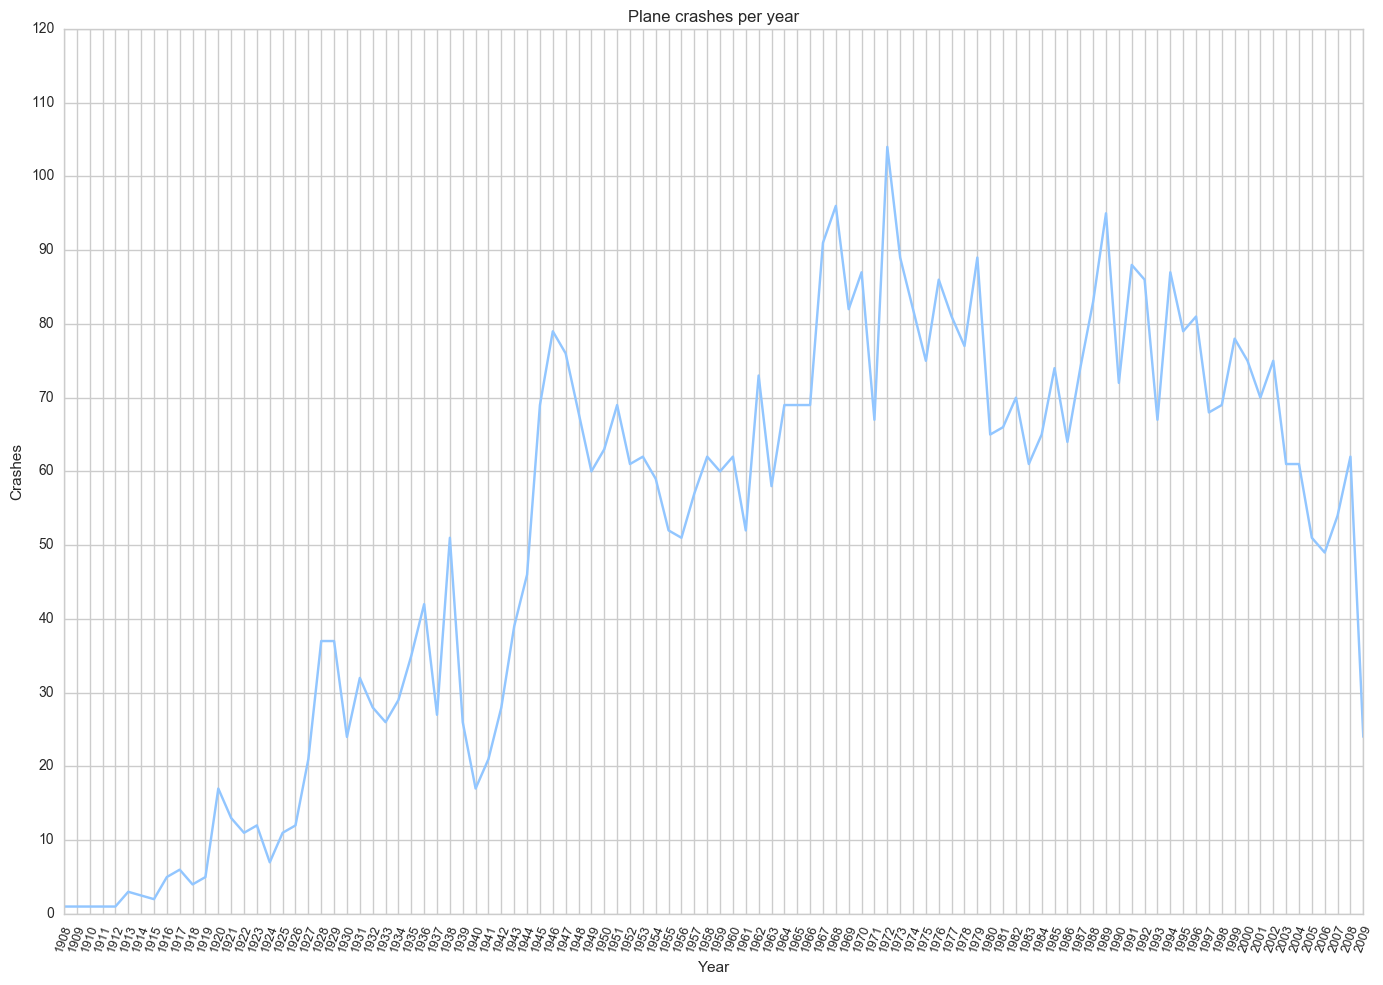

In [8]:
by_year = data[['Date','Fatalities']].groupby('Date').count()

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)
plt.plot(by_year, color='b')
ax.set(ylabel="Crashes", xlabel="Year", title="Plane crashes per year")
plt.setp(ax.patches, linewidth=0)
ax.set_xlim(1908,2009)
ax.set_xticks(range(1908,2010,1))
ax.set_yticks(range(0,121,10))
#plt.setp(ax.set_xlim(1908,2016))
plt.setp(ax.get_xticklabels(), rotation=70, fontsize=9)
plt.tight_layout(w_pad=4, h_pad=3)

Observamos que se produce un aumento de siniestralidad con los años, sobre todo a partir del comienzo de la Segunda Guerra Mundial y la expansión de la aviación comercial, alcanzando sus fases más elevadas a mediados de los 60-70 y en la década de los 90.

Obtenemos y dibujamos las frecuencias del número de accidentes por tipo de avión

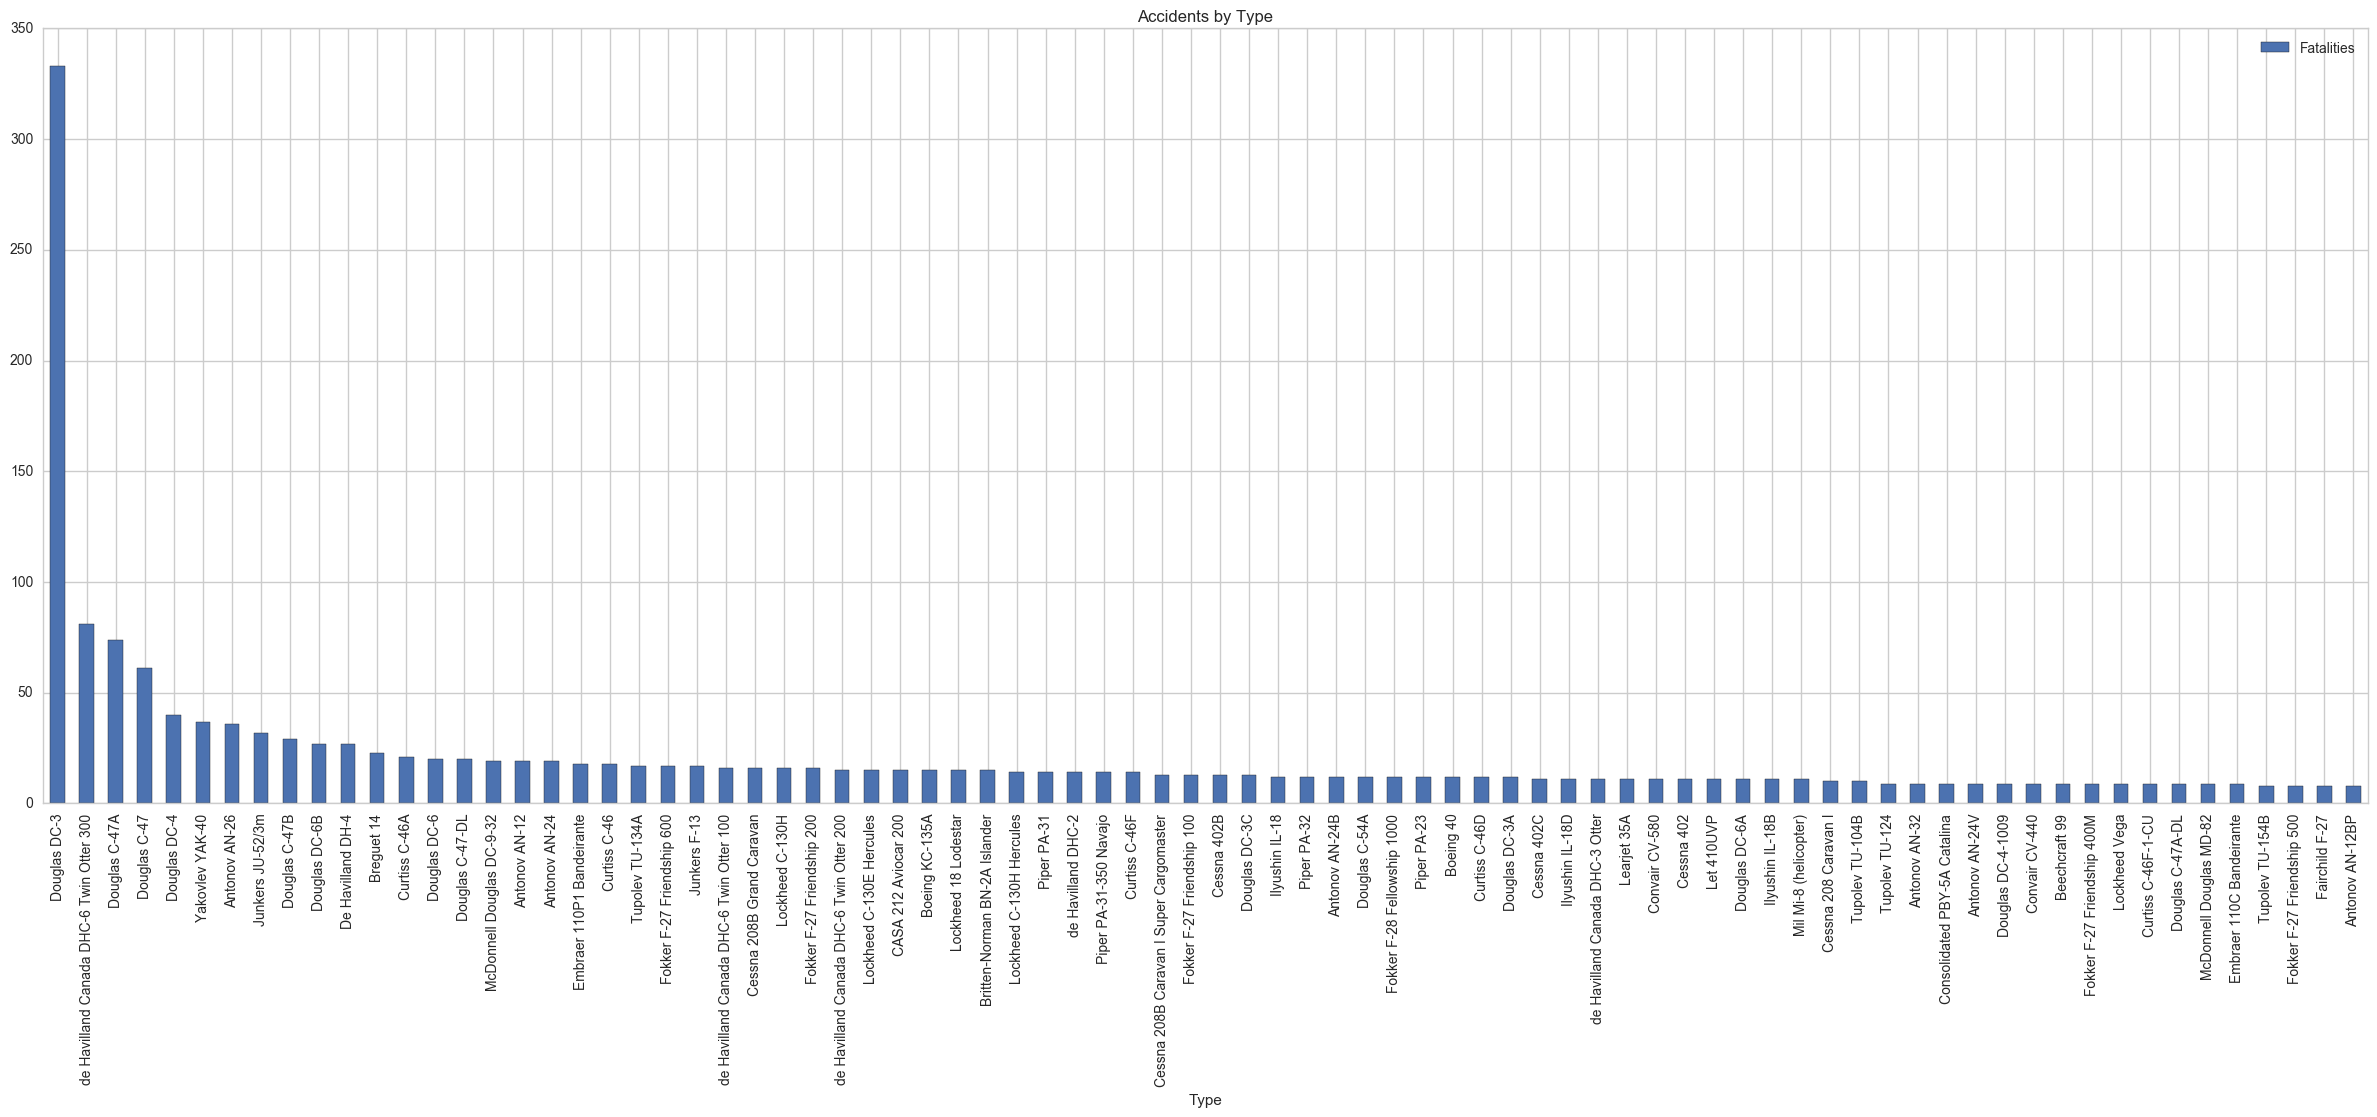

In [9]:
#Frecuencias por tipo de avión
by_type = data[['Type','Fatalities']].groupby('Type').count()
crashes_by_type = by_type.sort_values('Fatalities', ascending = False)
crashes_by_type.head(80).plot(kind='bar',title='Accidents by Type',grid=True,figsize = (30,10))

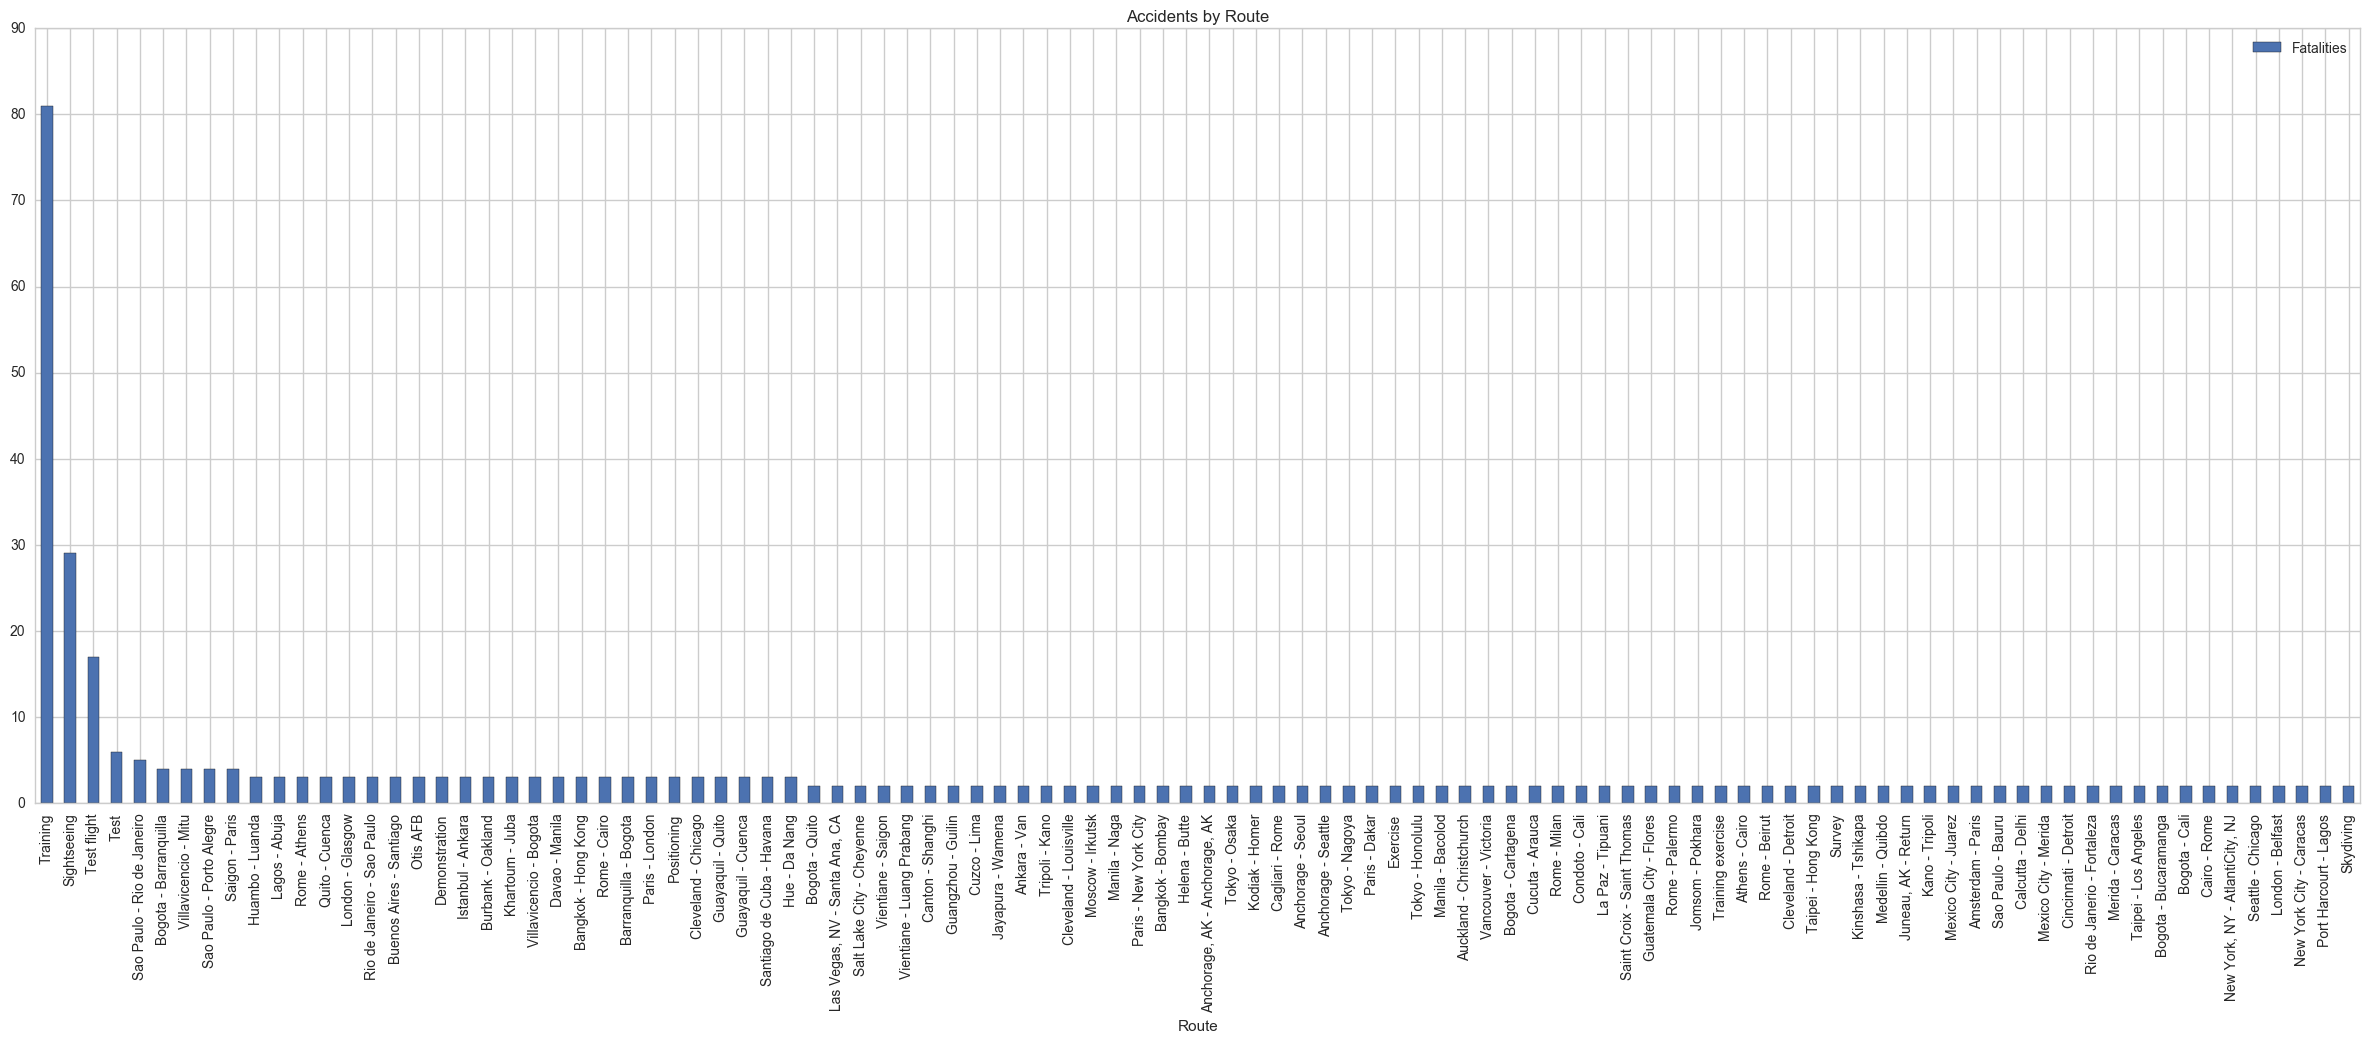

In [10]:
#Frecuencias por ruta
#by_type = data[['Type','Fatalities']].groupby('Type').agg(['count'])
by_route = data[['Route','Fatalities']].groupby('Route').count()
crashes_by_route = by_route.sort_values('Fatalities', ascending = False)
crashes_by_route.head(100).plot(kind='bar',title='Accidents by Route',grid=True,figsize = (30,10))

Ambas son distribuciones de variable discreta y se parecen a la distribución geométrica.

Estudiamos los tipos de avión más "peligrosos", por número de accidentes y número de muertes ("fatalities").

In [11]:
#Tipos de avión más peligrosos por número de accidentes
crashes_by_type.head(10)

,Fatalities
Type,
Douglas DC-3,333
de Havilland Canada DHC-6 Twin Otter 300,81
Douglas C-47A,74
Douglas C-47,61
Douglas DC-4,40
Yakovlev YAK-40,37
Antonov AN-26,36
Junkers JU-52/3m,32
Douglas C-47B,29


In [12]:
#Tipos de avión más peligrosos por número de muertes
deaths_by_type = data[['Type','Fatalities']].groupby('Type').sum().sort_values('Fatalities', ascending = False)
deaths_by_type.head(10)

,Fatalities
Type,
Douglas DC-3,4793.0
Antonov AN-26,1068.0
Douglas DC-6B,1055.0
Douglas C-47,1046.0
McDonnell Douglas DC-9-32,951.0
Douglas DC-4,930.0
Ilyushin IL-18B,852.0
Yakovlev YAK-40,834.0
Tupolev TU-134A,809.0


Separamos aviones militares de comerciales. Comenzamos con los militares.

In [13]:
data2 = data[data['Operator'].notnull()]
military = data2[data2['Operator'].str.contains('Military')]
#Por número de accidentes
military_by_type = military[['Type', 'Fatalities']].groupby('Type').count().sort_values('Fatalities', ascending = False)
military_by_type.head(10)

,Fatalities
Type,
Douglas C-47,27
Lockheed C-130H,16
Boeing KC-135A,15
Antonov AN-26,15
Douglas C-47B,14
Lockheed C-130E Hercules,14
Lockheed C-130H Hercules,13
Douglas C-47A,12
Antonov AN-12,10


In [14]:
#Por número de muertes
deaths_military_by_type = military[['Type', 'Fatalities']].groupby('Type').sum().sort_values('Fatalities', ascending = False)
deaths_military_by_type.head(10)

,Fatalities
Type,
Lockheed C-130H,786.0
Douglas C-47,616.0
Antonov AN-26,539.0
Antonov AN-12,370.0
Mil Mi-8 (helicopter),351.0
Antonov AN-32,322.0
Antonov AN-22,302.0
Ilyushin Il-76MD,275.0
Lockheed C-130B Hercules,274.0


Seguimos con los comerciales.

In [15]:
commercial = data2[data2['Operator'].str.contains('Military')==False]
#Por número de accidentes
commercial_by_type = commercial[['Type', 'Fatalities']].groupby('Type').count().sort_values('Fatalities', ascending = False)
commercial_by_type.head(10)

,Fatalities
Type,
Douglas DC-3,332
de Havilland Canada DHC-6 Twin Otter 300,77
Douglas C-47A,62
Douglas DC-4,39
Yakovlev YAK-40,36
Douglas C-47,33
Junkers JU-52/3m,32
De Havilland DH-4,27
Douglas DC-6B,26


In [16]:
#Por número de muertes
deaths_commercial_by_type = commercial[['Type', 'Fatalities']].groupby('Type').sum().sort_values('Fatalities', ascending = False)
deaths_commercial_by_type.head(10)

,Fatalities
Type,
Douglas DC-3,4780.0
Douglas DC-6B,1017.0
McDonnell Douglas DC-9-32,951.0
Douglas DC-4,912.0
Ilyushin IL-18B,852.0
Tupolev TU-134A,809.0
Yakovlev YAK-40,808.0
McDonnell Douglas DC-10-10,804.0
de Havilland Canada DHC-6 Twin Otter 300,745.0


Buscamos en los resúmenes ("Summary") de los accidentes la mención a explosiones y calculamos la media de muertes en los casos en los que hay explosión y en los que no hay.

In [17]:
explosion = data[data['Summary'].str.contains('explo', na = False)]
deaths_mean_explosion = explosion['Fatalities'].mean()
no_explosion = data[~data['Summary'].str.contains('explo', na = False)]
deaths_mean_no_explosion = no_explosion['Fatalities'].mean()
print "La media de muertes en accidentes de avión con explosión es:",deaths_mean_explosion
print "La media de muertes en accidentes de avión sin explosión es:",deaths_mean_no_explosion

La media de muertes en accidentes de avión con explosión es: 39.2666666667
La media de muertes en accidentes de avión sin explosión es: 19.3875098503


Ahora comparamos las dos muestras con t-test

In [18]:
explosion['Fatalities'].describe()

count    180.000000
mean      39.266667
std       55.692552
min        0.000000
25%        7.000000
50%       21.500000
75%       46.250000
max      346.000000
Name: Fatalities, dtype: float64

In [20]:
no_explosion['Fatalities'].describe()

count    5076.000000
mean       19.387510
std        31.912321
min         0.000000
25%              NaN
50%              NaN
75%              NaN
max       583.000000
Name: Fatalities, dtype: float64

Vemos que la diferencia entre el tamaño de las dos muestras y la diferencia entre sus varianzas es muy elevada, por lo que vamos a usar Welch's t-test.

In [21]:
from scipy import stats
stats.ttest_ind_from_stats(39.266667, 55.692552, 180, 19.387510, 31.912321, 5076, equal_var=False)

Ttest_indResult(statistic=4.7612765526701848, pvalue=3.8960292704264973e-06)

Obtenemos un valor de t bastate elevado y de p muy próximo a cero, lo que nos lleva a concluir que hay diferencia estadísticamente significativa entre las dos muestras.